In [4]:
# importing required modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

# making data frame from csv file
gdp_df = pd.read_csv("/DataSet1/dataset1.csv")
gdp_df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [5]:
#Reshaping data as per need. 
gdp_df = gdp_df.drop(gdp_df.index[[5,10]])
t_gdp_df = gdp_df.T
bac_gdp_df = t_gdp_df

In [6]:
#Calculating the average growth of states over the duration 2013-14, 2014-15 and 2015-16

t_gdp_df = t_gdp_df[t_gdp_df.columns[-3:]]
t_gdp_df = t_gdp_df.drop(['All_India GDP'])
t_gdp_df = t_gdp_df.drop(['West Bengal1'])
new_header = t_gdp_df.iloc[1]
t_gdp_df = t_gdp_df[2:]
t_gdp_df.columns = new_header
t_gdp_df["mean"] = round(t_gdp_df.mean(axis=1),2)
t_gdp_df.head()


Duration,2013-14,2014-15,2015-16,mean
Andhra Pradesh,12.85,13.4,15.85,14.03
Arunachal Pradesh,16.38,14.79,12.07,14.41
Assam,13.31,11.45,13.19,12.65
Bihar,12.3,17.92,10.59,13.60
Chhattisgarh,16.44,13.69,10.98,13.70


Text(0.5,1,'GDP growth for state per year')

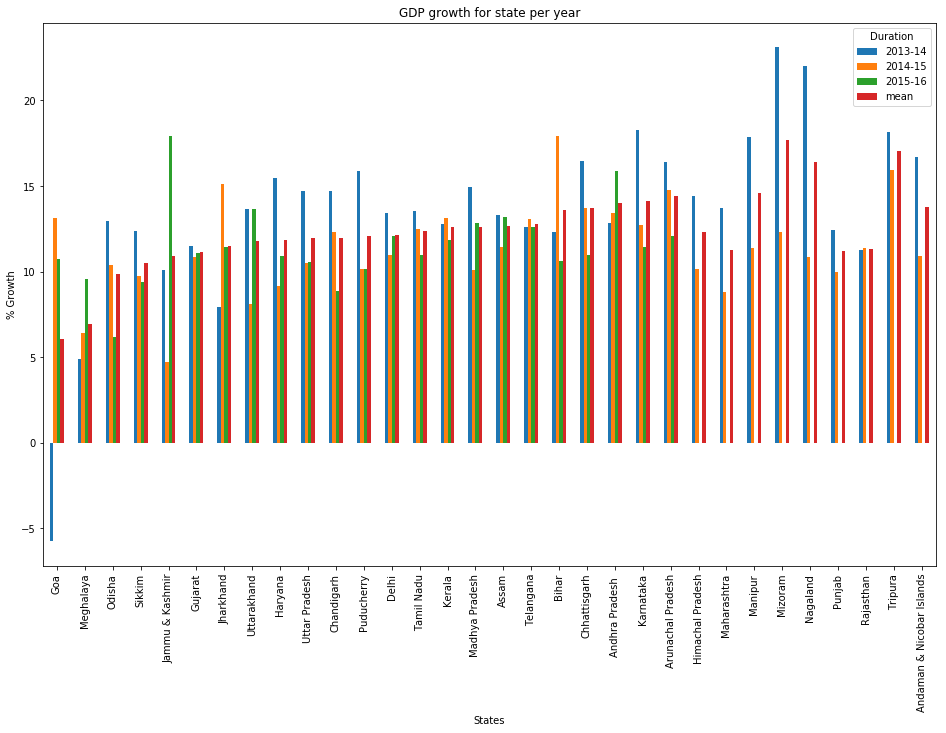

In [7]:
#Sorting values

t_gdp_df["total GDP"] = t_gdp_df['2013-14']+t_gdp_df['2014-15']+t_gdp_df['2015-16']
t_gdp_df.sort_values("total GDP", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

t_gdp_df_bak = t_gdp_df

#Plotting the values
graph_df = t_gdp_df.drop(['total GDP'], axis=1)
gdp_plot = graph_df.plot(kind='bar', legend=True, figsize=(16,10))
gdp_plot.set_ylabel('% Growth')
gdp_plot.set_xlabel('States')
gdp_plot.set_title('GDP growth for state per year')

Text(0.5,1,'Average growth for states per year')

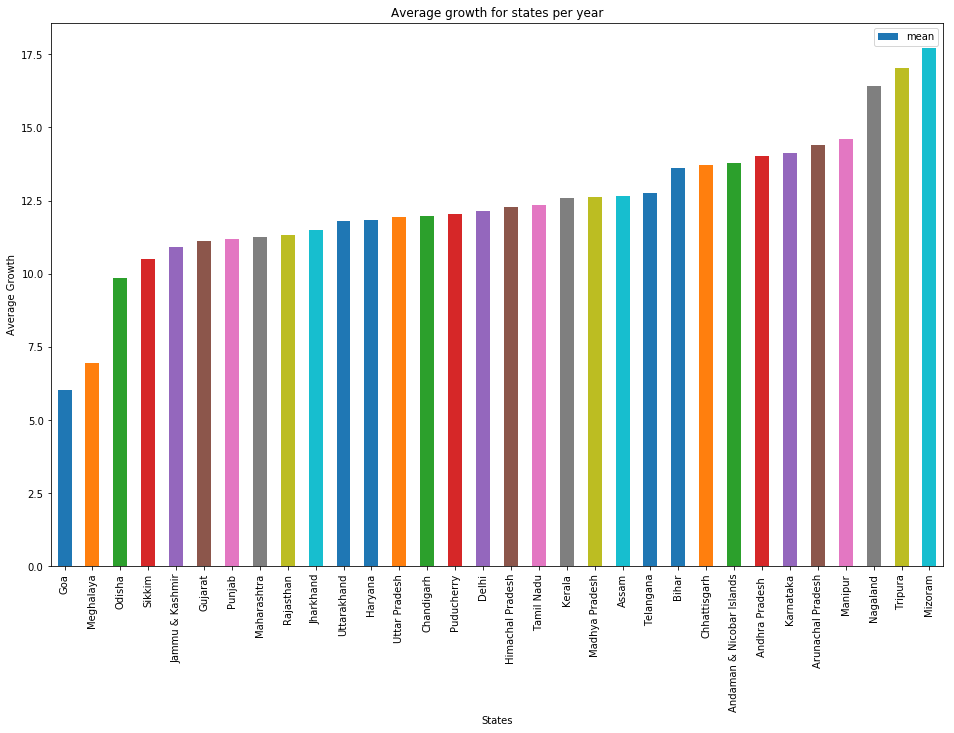

In [8]:
## average growth rates of the various states
#Plotting average growth rates

t_gdp_df.sort_values("mean", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

gdp_plot = t_gdp_df['mean'].plot(kind='bar', legend=True, figsize=(16,10))
gdp_plot.set_ylabel('Average Growth')
gdp_plot.set_xlabel('States')
gdp_plot.set_title('Average growth for states per year')

As per above graph struggling state is Goa. Also Mizoram is growing consistently fast.

Curiosity exercise - Average growth rate of my home state Maharastra is 11.26, Average national growth is 11.20.
Maharastra is growing faster by 0.06 points.

Text(0.5,1,'total GDP of the states for the year 2015-16')

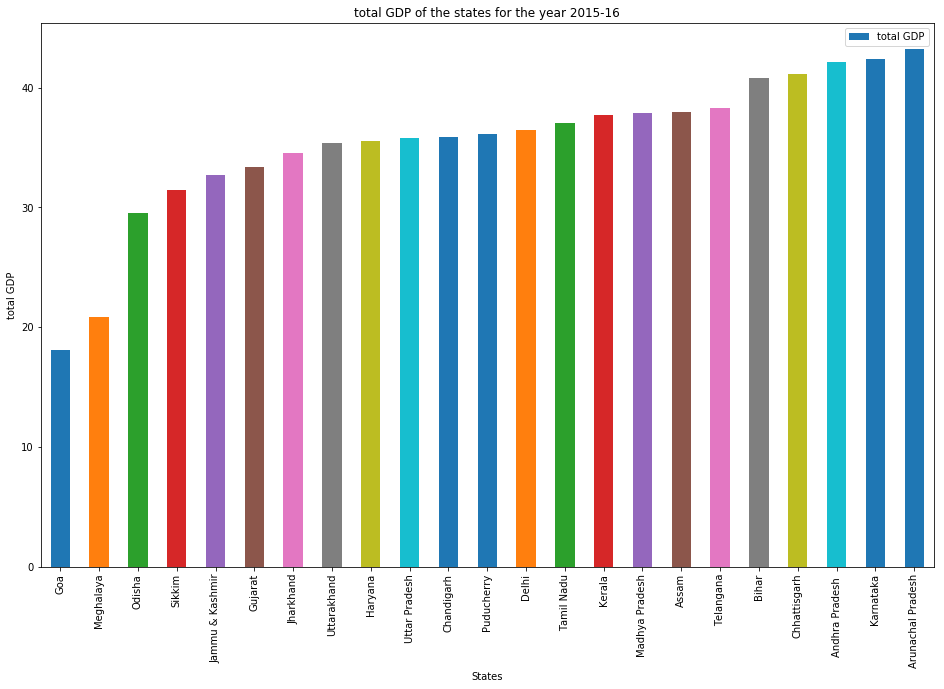

In [9]:
# Plot for total GDP of the states for the year 2015-16
gdp_plot = t_gdp_df_bak['total GDP'].dropna().plot(kind='bar', legend=True, figsize=(16,10))
gdp_plot.set_ylabel('total GDP')
gdp_plot.set_xlabel('States')
gdp_plot.set_title('total GDP of the states for the year 2015-16')

In [10]:
## Identify the top-5 and the bottom-5 states based on total GDP
## Top 5 States

print("---------------------- TOP 5 States----------------------")
print(t_gdp_df_bak.dropna().tail())
print("--------------------------------------------------------")

## bottom 5 States

print("--------------------- BOTTOM 5 States--------------------")
print(t_gdp_df_bak.dropna().head())
print("--------------------------------------------------------")

---------------------- TOP 5 States----------------------
Duration          2013-14 2014-15 2015-16   mean total GDP
Bihar                12.3   17.92   10.59  13.60     40.81
Chhattisgarh        16.44   13.69   10.98  13.70     41.11
Andhra Pradesh      12.85    13.4   15.85  14.03      42.1
Karnataka           18.24    12.7   11.42  14.12     42.36
Arunachal Pradesh   16.38   14.79   12.07  14.41     43.24
--------------------------------------------------------
--------------------- BOTTOM 5 States--------------------
Duration        2013-14 2014-15 2015-16   mean total GDP
Goa               -5.77   13.12   10.75   6.03      18.1
Meghalaya          4.87    6.41    9.58   6.95     20.86
Odisha            12.95   10.37    6.19   9.84     29.51
Sikkim            12.35    9.72    9.39  10.49     31.46
Jammu & Kashmir   10.09     4.7   17.91  10.90      32.7
--------------------------------------------------------
